In [1]:
import pandas as pd
import json
from itertools import product

from utils.static import *
from utils.plots import *
plot = Plot()

In [ ]:
def zoom(pos):
    x_center = np.mean([pos[node][0] for node in pos])
    y_center = np.mean([pos[node][1] for node in pos])
    zoom_factor = 0.2
    x_min = x_center - zoom_factor - 0.2
    x_max = x_center + zoom_factor + 0.15
    y_min = y_center - zoom_factor - 0.1
    y_max = y_center + zoom_factor + 0.35
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [86]:
def sparse_toy(sparse, G, pos, size = 3, alpha_background = 0.5):    
    plt.figure(figsize=(12, 10))

    edges = list(G.edges())

    if sparse.name != 'Full':
        sG = sparse(G)
        sG_edges = list(sG.edges())
        edges = list(set(edges) - set(sG_edges))

        sG_weights = {(u, v): f'{sG[u][v]["weight"]:.2f}' for u, v in sG_edges}
        nx.draw_networkx_edges(G, pos, sG_edges, width = size, 
                            edge_color=S_COLORS[sparse.name])
        nx.draw_networkx_edge_labels(G, pos, edge_labels=sG_weights, font_size=12)

    weights = {(u, v): f'{G[u][v]["weight"]:.2f}' for u, v in edges}
    
    nx.draw_networkx_edges(G, pos, edges, width = size * 0.5, 
                            edge_color='black', alpha=alpha_background)
    nx.draw_networkx_edge_labels(G, pos, 
                                    edge_labels=weights, font_color='black', font_size=12)
    nx.draw_networkx_nodes(G, pos, node_size=size*25, node_color='black')

    zoom(pos)
        
    out_path = f'plots/_presentation/sparsifiers'
    save_file(out_path, f'{sparse.name} final', no_bbox=True)
    #plt.show()

In [116]:
def local_degree_toy(G, pos, size = 3, alpha_background = 0.25, step = 0):

    plt.figure(figsize=(12, 10))

    edges = list(G.edges())

    alpha = 0.65
    sparse = LocalDegree()
    
    nx.draw_networkx_edges(G, pos, edges, width = size * 0.5, edge_color='black', alpha=alpha_background)
    nx.draw_networkx_nodes(G, pos, node_size=size*25, node_color='black', alpha=alpha_background)

    target_node = 3

    neighbors = list(G.neighbors(target_node))
    neighbors_width = np.array([G.degree(n, weight = 'weight') for n in neighbors])
    neighbors_width = 1 + neighbors_width / np.max(neighbors_width)
    neighbors_edges = [(target_node, neighbor) for neighbor in neighbors]
    node_labels = {node: f'\n\n{G.degree(node, weight = "weight"):.2f}' for node in neighbors}
    
    neighbors.sort(key=lambda n : G.degree(n, weight = 'weight'), reverse=True)
    num_edges_to_keep = int(np.floor(len(neighbors) ** alpha))
    selected_edges = [(target_node, neighbor, G[target_node][neighbor]['weight']) for neighbor in neighbors[:num_edges_to_keep]]

    nx.draw_networkx_edges(G, pos, neighbors_edges, width = size, edge_color='black')
    if step == 1: nx.draw_networkx_edges(G, pos, selected_edges, width = size * 2, edge_color=S_COLORS[sparse.name])
    nx.draw_networkx_nodes(G, pos, nodelist=[target_node], node_size=size*25, node_color='black')
    nx.draw_networkx_nodes(G, pos, nodelist=neighbors, node_size=size*25*neighbors_width, node_color='black')
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12)

    zoom(pos)
        
    out_path = f'plots/_presentation/sparsifiers'
    save_file(out_path, f'{sparse.name} {step}', no_bbox=True)
    #plt.show()

In [115]:
def k_neighbor_toy(G, pos, size = 3, alpha_background = 0.25, step = 0):
    
    plt.figure(figsize=(12, 10))

    edges = list(G.edges())

    sparse = kNeighbor()
    
    nx.draw_networkx_edges(G, pos, edges, width = size * 0.5, edge_color='black', alpha=alpha_background)
    nx.draw_networkx_nodes(G, pos, node_size=size*25, node_color='black', alpha=alpha_background)

    if step < 2:
        target_node = 13

        neighbors = list(G.neighbors(target_node))
        neighbors_edges = [(target_node, neighbor) for neighbor in neighbors]
        
        selected_edges = neighbors_edges

        nx.draw_networkx_edges(G, pos, neighbors_edges, width = size, edge_color='black')
        if step == 1: nx.draw_networkx_edges(G, pos, selected_edges, width = size * 2, edge_color=S_COLORS[sparse.name])
        nx.draw_networkx_nodes(G, pos, nodelist=[target_node], node_size=size*25, node_color='black')

    else:
        target_node = 0

        neighbors = list(G.neighbors(target_node))
        neighbors_edges = [(target_node, neighbor) for neighbor in neighbors]
        
        selected_edges = [(0, 3), (0, 7)]

        nx.draw_networkx_edges(G, pos, neighbors_edges, width = size, edge_color='black')
        if step == 2:
            weights = {(0, 2): f'pₑ ∝ wₑ'}
        if step == 3:
            weights = {(target_node, neighbor): f'{G[target_node][neighbor]["weight"]:.2f}' for neighbor in neighbors}
        if step == 4: 
            nx.draw_networkx_edges(G, pos, selected_edges, width = size * 2, edge_color=S_COLORS[sparse.name])
            weights = {(target_node, neighbor): f'{G[target_node][neighbor]["weight"]:.2f}' for neighbor in neighbors}

        nx.draw_networkx_edge_labels(G, pos, 
                                edge_labels=weights, font_color='black', font_size=12 + 2*(step == 2))
        nx.draw_networkx_nodes(G, pos, nodelist=[target_node], node_size=size*25, node_color='black')

    zoom(pos)
            
    out_path = f'plots/_presentation/sparsifiers'
    save_file(out_path, f'{sparse.name} {step}', no_bbox=True)
    #plt.show()

In [96]:
def effective_resistance_toy(G, pos, size = 3, alpha_background = 0.25, step = 0):
    
    plt.figure(figsize=(12, 10))

    edges = list(G.edges())

    sparse = EffectiveResistance()
    Re = resistance_distance(G)
    
    nx.draw_networkx_edges(G, pos, edges, width = size, edge_color='black')
    nx.draw_networkx_nodes(G, pos, node_size=size*25, node_color='black', alpha=alpha_background)

    weights = {e : f'{G[e[0]][e[1]]["weight"]*Re[i]:.2f}' for i, e in enumerate(edges)}

    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_color='black', font_size=12)

    zoom(pos)
            
    out_path = f'plots/_presentation/sparsifiers'
    save_file(out_path, f'{sparse.name} {step}', no_bbox=True)
    #plt.show()

In [109]:
def random_toy(G, pos, size = 3, alpha_background = 0.25, step = 0):
    
    plt.figure(figsize=(12, 10))

    edges = list(G.edges())

    sparse = Random()
    
    nx.draw_networkx_edges(G, pos, edges, width = size, edge_color='black')
    nx.draw_networkx_nodes(G, pos, node_size=size*25, node_color='black', alpha=alpha_background)

    weights = {e : f'{G[e[0]][e[1]]["inverse weight"]:.2f}' for e in edges}

    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_color='black', font_size=12)

    zoom(pos)
            
    out_path = f'plots/_presentation/sparsifiers'
    save_file(out_path, f'{sparse.name} {step}', no_bbox=True)
    #plt.show()

In [103]:
def apsp_toy(G, pos, size = 3, alpha_background = 0.25, step = 0):
    
    plt.figure(figsize=(12, 10))

    edges = list(G.edges())

    sparse = APSP()
    
    nx.draw_networkx_edges(G, pos, edges, width = size * 0.5, edge_color='black', alpha=alpha_background)
    nx.draw_networkx_nodes(G, pos, node_size=size*25, node_color='black', alpha=alpha_background)


    neighbors_edges = [(2, 3), (2, 5), (3, 5)]

    selected_edges = [(2, 3), (3, 5)]

    nx.draw_networkx_edges(G, pos, neighbors_edges, width = size, edge_color='black')
    if step == 1: nx.draw_networkx_edges(G, pos, selected_edges, width = size * 2, edge_color=S_COLORS[sparse.name])
    nx.draw_networkx_edge_labels(G, pos, edge_labels={e: f'{G[e[0]][e[1]]["weight"]:.2f}' for e in edges}, font_size=12)

    zoom(pos)
            
    out_path = f'plots/_presentation/sparsifiers'
    save_file(out_path, f'{sparse.name} {step}', no_bbox=True)
    #plt.show()

In [28]:
G = BA(n = 15, m = 30)
G = Exponential(seed=1)(G)
add_inverse_weight(G)

for _, _, d in G.edges(data=True): d['exp weight'] = np.exp(d['weight'])

pos = nx.kamada_kawai_layout(G, weight='exp weight')

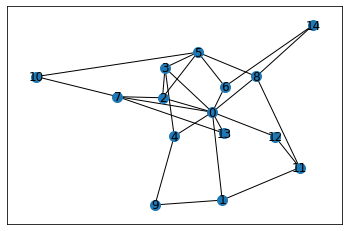

In [63]:
nx.draw_networkx(G, pos, node_size=100, with_labels=True)
plt.show()

In [117]:
local_degree_toy(G, pos, step = 0)
local_degree_toy(G, pos, step = 1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [118]:
for i in range(5):
    k_neighbor_toy(G, pos, step = i)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [98]:
effective_resistance_toy(G, pos, step = 0)
effective_resistance_toy(G, pos, step = 1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [110]:
random_toy(G, pos, step = 0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 864x720 with 0 Axes>

In [104]:
apsp_toy(G, pos, step = 0)
apsp_toy(G, pos, step = 1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [87]:
for sparse in SPARSIFIERS:
    sparse_toy(sparse, G, pos)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [1]:
import pandas as pd
import json
from itertools import product

from utils.static import *
from utils.plots import *
plot = Plot()

In [2]:
def perturbation_toy():
	G = nx.gnm_random_graph(6, 8, seed=1)
	w = Exponential(seed=1)
	G = w(G)


	edges = {}
	G1 = G.copy()
	a, b = EdgeRemoval()(G1, w.w())
	edges[1] = {'rem' : [(a, b)]}
	G2 = G.copy()
	a, b = EdgeAddition()(G2, w.w())
	edges[2] = {'add' : [(a, b)]}
	G3 = G.copy()
	a, b, c, d = RandomEdgeSwitching()(G3, w.w())
	edges[3] = {'rem': [(a, b)], 'add': [(c, d)]}
	G4 = G.copy()
	a, b, c, d = DegreePreservingEdgeSwitching()(G4, w.w())
	print((a, c) in G.edges() or (b, d) in G.edges())
	edges[4] = {'rem': [(a, b), (c, d)], 'add': [(a, c), (b, d)]}

	G_max = G.copy()
	G_max.add_edges_from([e for i in [2, 3, 4] for e in edges[i]['add']])

	pos = nx.spring_layout(G_max)

	nx.draw_networkx(G_max, pos, node_size=50)
	plt.show()
	plt.clf()

	node_size = 50
	edge_width = 2
	changing_edge_width = 4

	nx.draw_networkx_edges(G, pos, width = edge_width, edge_color='black')
	nx.draw_networkx_nodes(G, pos, node_size=node_size)
	save_file('plots/_presentation/perturbation_toy', 'original', no_bbox=True)
	plt.clf()

	nx.draw_networkx_edges(G, pos, width = edge_width, edge_color='black')
	nx.draw_networkx_edges(G, pos, edges[1]['rem'], width = changing_edge_width, edge_color='red')
	nx.draw_networkx_nodes(G, pos, node_size=node_size)
	save_file('plots/_presentation/perturbation_toy', 'removal 1', no_bbox=True)
	plt.clf()

	nx.draw_networkx_edges(G1, pos, width = edge_width, edge_color='black')
	nx.draw_networkx_nodes(G1, pos, node_size=node_size)
	save_file('plots/_presentation/perturbation_toy', 'removal 2', no_bbox=True)
	plt.clf()

	nx.draw_networkx_edges(G, pos, width = edge_width, edge_color='black')
	nx.draw_networkx_edges(G, pos, edges[2]['add'], width = changing_edge_width, edge_color='green')
	nx.draw_networkx_nodes(G, pos, node_size=node_size)
	save_file('plots/_presentation/perturbation_toy', 'addition 1', no_bbox=True)
	plt.clf()

	nx.draw_networkx_edges(G2, pos, width = edge_width, edge_color='black')
	nx.draw_networkx_nodes(G2, pos, node_size=node_size)
	save_file('plots/_presentation/perturbation_toy', 'addition 2', no_bbox=True)
	plt.clf()

	nx.draw_networkx_edges(G, pos, width = edge_width, edge_color='black')
	nx.draw_networkx_edges(G, pos, edges[3]['rem'], width = changing_edge_width, edge_color='red')
	nx.draw_networkx_nodes(G, pos, node_size=node_size)
	save_file('plots/_presentation/perturbation_toy', 'switching 1', no_bbox=True)
	plt.clf()

	nx.draw_networkx_edges(G, pos, width = edge_width, edge_color='black')
	nx.draw_networkx_edges(G, pos, edges[3]['rem'], width = changing_edge_width, edge_color='red')
	nx.draw_networkx_edges(G, pos, edges[3]['add'], width = changing_edge_width, edge_color='green')
	nx.draw_networkx_nodes(G, pos, node_size=node_size)
	save_file('plots/_presentation/perturbation_toy', 'switching 2', no_bbox=True)
	plt.clf()

	nx.draw_networkx_edges(G3, pos, width = edge_width, edge_color='black')
	nx.draw_networkx_nodes(G3, pos, node_size=node_size)
	save_file('plots/_presentation/perturbation_toy', 'switching 3', no_bbox=True)
	plt.clf()

	nx.draw_networkx_edges(G, pos, width = edge_width, edge_color='black')
	nx.draw_networkx_edges(G, pos, edges[4]['rem'], width = changing_edge_width, edge_color='red')
	nx.draw_networkx_nodes(G, pos, node_size=node_size)
	save_file('plots/_presentation/perturbation_toy', 'deg switching 1', no_bbox=True)
	plt.clf()

	nx.draw_networkx_edges(G, pos, width = edge_width, edge_color='black')
	nx.draw_networkx_edges(G, pos, edges[4]['rem'], width = changing_edge_width, edge_color='red')
	nx.draw_networkx_edges(G, pos, edges[4]['add'], width = changing_edge_width, edge_color='green')
	nx.draw_networkx_nodes(G, pos, node_size=node_size)
	save_file('plots/_presentation/perturbation_toy', 'deg switching 2', no_bbox=True)
	plt.clf()

	nx.draw_networkx_edges(G4, pos, width = edge_width, edge_color='black')
	nx.draw_networkx_nodes(G4, pos, node_size=node_size)
	save_file('plots/_presentation/perturbation_toy', 'deg switching 3', no_bbox=True)
	plt.clf()

False


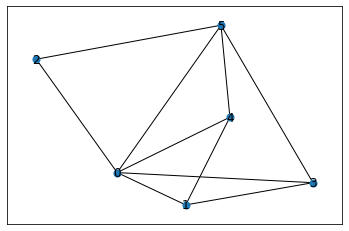

<Figure size 432x288 with 0 Axes>

In [5]:
perturbation_toy()

In [9]:

nec_sp = list(set([1, 2, 3]) & set([2, 5]))

In [59]:

def perturbation_animation(G, weight, K, sparse, pert_color, sparse_color = None, size = 4, alpha_background = 0.3):
    if sparse_color is None: sparse_color = S_COLORS[sparse.name]

    graphs    = [G]
    s_graphs  = [sparse(G)]
    new_edges = []
    new_edges_record = [[]]

    H = G.copy()

    for _ in range(K):
        u,v = EdgeAddition()(H, weight.w())
        graphs.append(H.copy())
        s_graphs.append(sparse(H))
        new_edges_record.append(new_edges.copy())
        new_edges.append((u, v))

    add_inverse_weight(H)
    pos = nx.kamada_kawai_layout(H, weight='inverse weight')

    for i, (g, sg, ne, nec) in enumerate(zip(graphs, s_graphs, [None] + new_edges, new_edges_record)):
        plt.figure(figsize=(30, 24))

        NE = [ne] if ne is not None else []

        nx.draw_networkx_edges(G, pos, list(g.edges()), width = 1.5*size, edge_color='black', alpha=alpha_background)
        nx.draw_networkx_edges(G, pos, nec, width = 2*size, edge_color=pert_color)
        nx.draw_networkx_edges(G, pos, NE, width = 3.5*size, edge_color=pert_color)
        nx.draw_networkx_nodes(G, pos, node_size=16*size, node_color='gray')

        out_path = f'plots/_presentation/perturbation'
        save_file(out_path, f'full {i}', no_bbox=True)
        plt.clf()

        plt.figure(figsize=(30, 24))
        nec_sp = [e for e in nec if sg.has_edge(*e)]

        nx.draw_networkx_edges(G, pos, list(sg.edges()), width = 1.5*size, edge_color=sparse_color, alpha=alpha_background)
        nx.draw_networkx_edges(G, pos, nec_sp, width = 2*size, edge_color=pert_color)
        nx.draw_networkx_edges(G, pos, NE, width = 3.5*size, edge_color=pert_color)
        nx.draw_networkx_nodes(G, pos, node_size=16*size, node_color='gray')

        out_path = f'plots/_presentation/perturbation'
        save_file(out_path, f'{sparse.name} {i}', no_bbox=True)
        plt.clf()

In [57]:
G = RG(n = 50, radius=0.2, s=5)
K = list(nx.connected_components(G))
K.sort(key = len, reverse=True)
G = G.subgraph(K[0])
w = Exponential(seed=1)
G = w(G)

In [60]:
perturbation_animation(G, w, 10, APSP(), pert_color = 'green')

c:\Users\Nicol\Miniconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

<Figure size 2160x1728 with 0 Axes>

In [11]:
import pandas as pd
import json
from itertools import product

from utils.static import *
from utils.plots import *
plot = Plot()

In [6]:
def perturbation_distances(
            dfs, graph, weight, metric, perturbation, my_sparse = None, N = N_PERTURBATIONS):
	
	df = dfs[(graph, weight)]
	for sparse in S_NAME:
		m = df[sparse][metric.id]['mean'].to_numpy()
		s = 0.3*df[sparse][metric.id]['std'].to_numpy()
		i = np.arange(len(s))
		s[i[i % 5 != 1]] = 0
		x = np.concatenate(([0], np.arange(1, N+1, 5)))

		if my_sparse is None or sparse == my_sparse or sparse == 'Full':
			plt.errorbar(x, m, yerr = s, linestyle='-', label = sparse, color=S_COLORS[sparse])
		else:
			plt.errorbar(x, m, yerr = s, linestyle='-', alpha = 0)

		
	plt.title(f'{perturbation} on {weight} {graph}\n')
	plt.xlabel(f'# {perturbation}\n')
	plt.ylabel(f'{metric.name}\n')
	plt.legend(loc='upper left', fontsize = 'x-small')

	out_path = f'plots/_presentation/perturbation'
	file_name = 'distance 1' if my_sparse is None else f'distance 2'
	save_file(out_path, file_name)

def perturbation_deviation_by_graph(D_dd, metric, perturbation, 
									error, ylim, graph = None, weight = None, 
									normalized = False, sparse = None):
        
	TS = TS_NAME.copy()
	TS.sort(key=lambda s: abs(D_dd[s][('MAN', error.id)]))

	_, ax = plt.subplots(figsize=(6, 4))

	if graph is not None: R = 3*G_NAME.index(graph) + W_NAME.index(weight)
	key = error.id if not normalized else ('normalized', error.id)

	for s in TS:
		for i, dev in enumerate(D_dd[s][key]):
			if graph is not None:
				if i == R and (sparse is None or s == sparse):
					ax.errorbar(i, dev, fmt='o', color=S_COLORS[s], markersize=5, label = s)
				else:
					ax.errorbar(i, dev, fmt='o', color=S_COLORS[s], markersize=5, alpha = 0)
			elif sparse is not None:
				if s == sparse:
					if i == 0:
						ax.errorbar(i, dev, fmt='o', color=S_COLORS[s], markersize=5, label = s)
					else:
						ax.errorbar(i, dev, fmt='o', color=S_COLORS[s], markersize=5)
			else:
				if i == 0:
					ax.errorbar(i, dev, fmt='o', color=S_COLORS[s], markersize=5, label = s)
				else:
					ax.errorbar(i, dev, fmt='o', color=S_COLORS[s], markersize=5)

	xitcks_pos = np.arange(len(G_NAME) * len(W_NAME))
	ax.set_xticks(xitcks_pos)
	if graph is not None:
		labs = ["   "] * 12
		labs[R] = weight
		ax.set_xticklabels(labs, fontsize=8)
	else:
		ax.set_xticklabels(W_NAME * len(G_NAME), fontsize=8)

	for i, g_name in enumerate(G_NAME):
		if graph is not None:
			if g_name == graph:
				pos = xitcks_pos[1+i*len(W_NAME)]
				ax.text(pos, -0.1, g_name, ha='center', va='top', transform=ax.get_xaxis_transform(),
						fontsize=10)
		else:
			pos = xitcks_pos[1+i*len(W_NAME)]
			ax.text(pos, -0.1, g_name, ha='center', va='top', transform=ax.get_xaxis_transform(),
					fontsize=10)
		
	for i in range(len(G_NAME) - 1):
		pos = 1/2 * (xitcks_pos[1+i*len(W_NAME)] + xitcks_pos[1+(i+1)*len(W_NAME)])
		ax.axvline(x=pos, color='black', linestyle='-', linewidth=0.5, alpha = 0.5)

	plt.axhline(y=0, linestyle='-', color='black')

	ylim = 10 ** np.ceil(np.log10(ylim)) if not normalized else 1
	ax.set_ylim([-ylim, ylim]) if error.negative else ax.set_ylim([0, ylim])
	ax.set_yscale('symlog', linthresh = ylim/100, subs = list(range(2, 10, 2)))
	ax.yaxis.set_major_formatter(FuncFormatter(custom_symlog_formatter))
	ax.grid(axis='y', linestyle=':')

	normalized_string = 'normalized ' if normalized else ''

	ax.set_title(f'{perturbation} test\n{normalized_string}{error.name}')
	ax.set_ylabel(metric.name)
	ax.set_xlabel('Graphs')
	ax.legend(loc='lower left', fontsize='x-small')

	out_path = f'plots/_presentation/perturbation'
	if graph is not None and sparse is not None: nb = 5
	elif graph is not None: nb = 2
	elif sparse is not None: nb = 4
	elif normalized: nb = 3
	else: nb = 1
	save_file(out_path, f'by graph {nb}')

def perturbation_deviation_by_sparsifier(D_dd, perturbation, error, my_metric = None, loc = True, my_sparse = None):
        
	plt.figure(figsize=(8, 4))

	TS = TS_NAME.copy()
	MET = METRICS.copy()

	TS.sort(key=lambda s: sum(abs(D_dd[m.id][s][('MAN', error.id)]) for m in MET))
	maximum = np.max([abs(D_dd[m][s][('MAN', error.id)]) for m, s in product(M_ID, TS)])

	for i, sparse in enumerate(TS):
		MET.sort(key=lambda m: abs(D_dd[m.id][sparse][('MAN', error.id)]))
		for j, metric in enumerate(MET):
			if my_metric is not None:
				if metric.id == my_metric.id and (my_sparse is None or sparse == my_sparse):
					mean = D_dd[metric.id][sparse][('MAN', error.id)] / maximum
					offset = -0.3 + j*(0.6/(len(MET)-1))
					plt.bar(i + offset, mean, hatch = M_HATCHES[metric],
							width = 0.15, color = S_COLORS[sparse])
				else:
					mean = D_dd[metric.id][sparse][('MAN', error.id)] / maximum
					offset = -0.3 + j*(0.6/(len(MET)-1))
					plt.bar(i + offset, mean,
							width = 0.15, alpha = 0)
			else:
				mean = D_dd[metric.id][sparse][('MAN', error.id)] / maximum
				offset = -0.3 + j*(0.6/(len(MET)-1))
				plt.bar(i + offset, mean, hatch = M_HATCHES[metric],
								width = 0.15, color = S_COLORS[sparse])
			
	fig, ax = plt.subplots()
	ax.axis('off')
	legend_handles = []
	for metric in MET:
		if my_metric is None or metric.id == my_metric.id:
			legend_handles.append(ax.bar([0], [0], hatch = M_HATCHES[metric], label=metric.name, 
											color = 'white', edgecolor = 'black'))
											
	plt.close(fig)

	plt.xticks(np.arange(len(TS)), labels=TS, fontsize='x-small')
	plt.ylim([0, 1.1])

	if loc: plt.legend(handles=legend_handles, loc='upper left', fontsize='small',  
			handleheight=3, handlelength=3)
	plt.title(f'{perturbation} test\n')
	plt.ylabel(f'Average normalized {error.id}\n')

	out_path = f'plots/_presentation/perturbation'
	if my_sparse is not None: file_name = f'by sparsifier 1'
	elif my_metric is not None: file_name = f'by sparsifier 2'
	else: file_name = f'{perturbation} by sparsifier'
	save_file(out_path, file_name)

In [18]:
def perturbation_deviation_by_sparsifier_transparency(D_dd, perturbation, error, nb, 
										 my_metrics = METRICS, my_sparse = TS_NAME, loc = True):
        
	plt.figure(figsize=(8, 4))

	TS = TS_NAME.copy()
	MET = METRICS.copy()

	TS.sort(key=lambda s: sum(abs(D_dd[m.id][s][('MAN', error.id)]) for m in MET))
	maximum = np.max([abs(D_dd[m][s][('MAN', error.id)]) for m, s in product(M_ID, TS)])

	for i, sparse in enumerate(TS):
		MET.sort(key=lambda m: abs(D_dd[m.id][sparse][('MAN', error.id)]))
		for j, metric in enumerate(MET):
			alpha = 1 if metric.id in my_metrics and sparse in my_sparse else 0.1
			edgecolor = 'black' if metric.id in my_metrics and sparse in my_sparse else 'gray'
			mean = D_dd[metric.id][sparse][('MAN', error.id)] / maximum
			offset = -0.3 + j*(0.6/(len(MET)-1))
			plt.bar(i + offset, mean, hatch = M_HATCHES[metric], edgecolor = edgecolor,
							width = 0.15, color = S_COLORS[sparse], alpha = alpha)
			
	fig, ax = plt.subplots()
	ax.axis('off')
	legend_handles = []
	for metric in MET:
		legend_handles.append(ax.bar([0], [0], hatch = M_HATCHES[metric], label=metric.name, 
										color = 'white', edgecolor = 'black'))
											
	plt.close(fig)

	plt.xticks(np.arange(len(TS)), labels=TS, fontsize='x-small')
	plt.ylim([0, 1.1])

	if loc: plt.legend(handles=legend_handles, loc='upper left', fontsize='small',  
			handleheight=3, handlelength=3)
	plt.title(f'{perturbation} test\n')
	plt.ylabel(f'Average normalized {error.id}\n')

	out_path = f'plots/_presentation/perturbation/discussion'
	save_file(out_path, f'{nb} {perturbation}')

def perturbation_distances_transparency(
            dfs, graph, weight, metric, perturbation, my_sparse = TS_NAME, N = N_PERTURBATIONS):
	
	df = dfs[(graph, weight)]
	for sparse in S_NAME:
		m = df[sparse][metric.id]['mean'].to_numpy()
		s = 0.3*df[sparse][metric.id]['std'].to_numpy()
		i = np.arange(len(s))
		s[i[i % 5 != 1]] = 0
		x = np.concatenate(([0], np.arange(1, N+1, 5)))

		if sparse in my_sparse:
			plt.errorbar(x, m, yerr = s, linestyle='-', label = sparse, color=S_COLORS[sparse], linewidth = 2)
		else:
			plt.errorbar(x, m, yerr = s, linestyle='-', label = sparse, color=S_COLORS[sparse], alpha = 0.1)

		
	plt.title(f'{perturbation} on {weight} {graph}\n')
	plt.xlabel(f'# {perturbation}\n')
	plt.ylabel(f'{metric.name}\n')
	plt.legend(loc='lower right', fontsize = 'x-small')

	out_path = f'plots/_presentation/perturbation'
	file_name = 'distance transparency'
	save_file(out_path, file_name)

In [13]:
D_p_dists, D_p_edges, M_p_dists, M_p_edges, D_p_dd = load_perturbation_dfs(compute = True)

In [14]:
g = 'BA'
w = 'Exp'
p = 'Edge removal'
m = NormalizedLaplacianSpectrum()
s = 'APSP'
e = MAE()

In [33]:
perturbation_distances(D_p_dists[p], g, w, m, p)
perturbation_distances(D_p_dists[p], g, w, m, p, s)

<Figure size 432x288 with 0 Axes>

In [20]:
perturbation_distances_transparency(D_p_dists[p], g, w, m, p, ['Full', 'K-Neighbor', 'Effective Resistance', 'Random'])

<Figure size 432x288 with 0 Axes>

In [7]:
perturbation_deviation_by_graph(D_p_dd[p][m.id], m, p, e, D_p_dd[('max', e.id)][m.id])
perturbation_deviation_by_graph(D_p_dd[p][m.id], m, p, e, D_p_dd[('max', e.id)][m.id], g, w)
perturbation_deviation_by_graph(D_p_dd[p][m.id], m, p, e, D_p_dd[('max', e.id)][m.id], normalized=True)
perturbation_deviation_by_graph(D_p_dd[p][m.id], m, p, e, D_p_dd[('max', e.id)][m.id], sparse=s, normalized=True)
perturbation_deviation_by_graph(D_p_dd[p][m.id], m, p, e, D_p_dd[('max', e.id)][m.id], g, w, sparse=s)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [40]:
perturbation_deviation_by_sparsifier(D_p_dd[p], p, e, m)
perturbation_deviation_by_sparsifier(D_p_dd[p], p, e, m, my_sparse=s)

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

In [42]:
for i, p in enumerate(P_NAME):
	perturbation_deviation_by_sparsifier(D_p_dd[p], p, e, loc = i == 0)

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

In [6]:
sp = ['Full', 'Random', 'Threshold', 'Local Degree', 'K-Neighbor', 'Effective Resistance', 'APSP']
mer = [LaplacianSpectrum(), NormalizedLaplacianSpectrum(), NetlsdHeat(), PortraitDivergence()]
me = M_ID

In [9]:
Focus = [
    ([sp[1], sp[4], sp[5]], me),
    ([sp[1], sp[5]], me[1:]),
    ([sp[1], sp[4]], me[:3]),
    ([sp[4], sp[5]], [me[1], me[2]]),
    ([sp[3], sp[6]], me),
    ([sp[2], sp[6]], [me[3]]),
    ([sp[4], sp[5]], [me[3]])
]

In [10]:

for j, (SP, ME) in enumerate(Focus):
	for i, p in enumerate(P_NAME):
		perturbation_deviation_by_sparsifier_transparency(
			D_p_dd[p], p, e, nb = j, my_metrics = ME, my_sparse = SP, loc = i == 0)

c:\Users\Nicol\Miniconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
c:\Users\Nicol\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

In [22]:
import pandas as pd
import json
from itertools import product

from utils.static import *
from utils.plots import *
plot = Plot()

D_g_dists, D_g_edges, M_g_dists, M_g_edges, D_g_dd = load_gaussian_noise_dfs(compute = True)

In [42]:
def gaussian_noise_distances(dfs, graph, weight, metric):
        
	df = dfs[(graph, weight)]
	for sparse in S_NAME:
		m = df[sparse][metric.id]['mean'].to_numpy()
		s = 0.3*df[sparse][metric.id]['std'].to_numpy()
		x = df[sparse].index

		plt.errorbar(x, m, yerr = s, linestyle='-',
						label = sparse, color=S_COLORS[sparse])


	plt.title(f'Gaussian Noise N(0,σ²) on {weight} {graph}\n')
	plt.ylabel(f'{metric.name}')
	plt.legend(loc='upper left', fontsize = 'x-small')
	plt.xlabel('σ', fontsize = 12)

	out_path = f'plots/_presentation/gaussian_noise'
	save_file(out_path, f'distance')

def perturbation_deviation_by_sparsifier(D_dd, error, nb = None, 
										 my_metrics = METRICS, my_sparse = TS_NAME):
	
	plt.figure(figsize=(8, 4))

	MET = METRICS.copy()
	TS = TS_NAME.copy()

	TS.sort(key=lambda s: sum(abs(D_dd[m.id][s][('MAN', error.id)]) for m in MET))
	maximum = max(abs(D_dd[m][s][('MAN', error.id)]) for m, s in product(M_ID, TS))

	for i, sparse in enumerate(TS):
		MET.sort(key=lambda m: abs(D_dd[m.id][sparse][('MAN', error.id)]))
		for j, metric in enumerate(MET):
			mean = D_dd[metric.id][sparse][('MAN', error.id)] / maximum
			offset = -0.3 + j*(0.6/(len(MET)-1))

			if nb is not None:
				alpha = 1 if metric.id in my_metrics and sparse in my_sparse else 0.1
				edgecolor = 'black' if metric.id in my_metrics and sparse in my_sparse else 'gray'

				plt.bar(i + offset, mean, hatch = M_HATCHES[metric],
					width = 0.15, color = S_COLORS[sparse], alpha = alpha, edgecolor = edgecolor)
			else:
			
				plt.bar(i + offset, mean, hatch = M_HATCHES[metric],
					width = 0.15, color = S_COLORS[sparse])
			
	fig, ax = plt.subplots()
	ax.axis('off')
	legend_handles = []
	for metric in MET:
		legend_handles.append(ax.bar([0], [0], hatch = M_HATCHES[metric], label=metric.name, 
										color = 'white', edgecolor = 'black'))
	plt.close(fig)
		
	plt.xticks(np.arange(len(TS)), labels=TS,  fontsize='x-small')
	plt.ylim([0, 1.1])

	plt.title(f'Gaussian noise test\n')
	plt.legend(handles=legend_handles, loc='upper left', fontsize='small', 
			handleheight=3, handlelength=3)
	plt.ylabel(f'Average normalized {error.id}\n')

	if nb is not None:
		out_path = f'plots/_presentation/gaussian_noise/discussion'
		save_file(out_path, f'{nb}')
	else:
		out_path = f'plots/_presentation/gaussian_noise'
		save_file(out_path, f'by sparsifier')

In [24]:
g = 'BA'
w = 'Exp'
p = 'Edge removal'
m = NormalizedLaplacianSpectrum()
s = 'APSP'
e = MAE()

In [25]:
sp = ['Full', 'Random', 'Threshold', 'Local Degree', 'K-Neighbor', 'Effective Resistance', 'APSP']
mer = [LaplacianSpectrum(), NormalizedLaplacianSpectrum(), NetlsdHeat(), PortraitDivergence()]
me = M_ID

In [34]:
Focus = [
    ([sp[1], sp[4], sp[5]], me),
    (sp, [me[0]]),
    ([sp[1], sp[4], sp[5]], me[1:]),
    ([sp[3], sp[6]], me),
]

In [43]:
gaussian_noise_distances(D_g_dists, g, w, m)

<Figure size 432x288 with 0 Axes>

In [38]:
for j, (SP, ME) in enumerate(Focus):
	perturbation_deviation_by_sparsifier(
		D_g_dd, e, nb = j, my_metrics = ME, my_sparse = SP)

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

In [39]:
perturbation_deviation_by_sparsifier(D_g_dd, e)

<Figure size 576x288 with 0 Axes>

In [2]:
import pandas as pd
import json
from itertools import product

from utils.static import *
from utils.plots import *
plot = Plot()

D_c, labels, D_a, best_approx_index = load_clustering_dfs(compute = False, K = K_TEST_REP)

In [13]:
def clustering_precision_recall_curve_3D(D_d, metric, labels, class_characterisation):

	class_m = class_matrix(labels, class_characterisation)
	thresholds = np.linspace(0, 1, 10**4)
	k = len(class_characterisation)
	rdm_chance = prevalence(class_m, k)

	pra = {}

	for sparse in S_NAME:
		distance_m = D_d[sparse][metric.id].to_numpy()
		distance_m = distance_m / np.max(distance_m)

		precisions, recalls = precisions_recalls(distance_m, class_m, thresholds, k)
		aupr = auc(recalls, precisions)

		pra[sparse] = (precisions, recalls, aupr)


	fig = plt.figure()
	ax = fig.add_subplot(111, projection='3d')

	for sparse in S_NAME:
		precisions, recalls, aupr = pra[sparse]

		ax.plot(recalls, thresholds, precisions, linestyle='-', 
				label=f'{sparse}', color=S_COLORS[sparse])
		ax.plot(recalls, thresholds, np.zeros_like(precisions), 
				linestyle='-', color=S_COLORS[sparse], alpha=0.3)
			
	ax.plot([0, 1], [0, 1], [rdm_chance, rdm_chance],
			linestyle=':', color='black',
			label=f'Prevalence')
	ax.plot([0, 1], [0, 1], [0, 0],
			linestyle=':', color='black', alpha=0.3)

	class_str = '(' + ', '.join(s.capitalize() for s in class_characterisation) + ')'
	ax.set_xlabel('Recall')
	ax.set_ylabel('Threshold')
	ax.set_zlabel('Precision')
	ax.set_xlim([0, 1])
	ax.set_ylim([0, 1])
	ax.set_zlim([0, 1])
	ax.legend(loc='upper right', fontsize='xx-small')
	ax.grid(True)

	plt.subplots_adjust(top=0.85)
	ax.set_title(f'Classification by {class_str}\n'
		+f'with {metric.name}\n')
	
	out_path = f'plots/_presentation/clustering/Precision-Recall'
	save_file(out_path, f'3D')

def clustering_precision_recall_curve(D_d, metric, labels, class_characterisation, AUPR = False):
        
	class_m = class_matrix(labels, class_characterisation)
	thresholds = np.linspace(0, 1, 10**4)
	k = len(class_characterisation)
	rdm_chance = prevalence(class_m, k)

	plt.figure(figsize=(6, 4))
	plt.subplots_adjust(top=0.85)

	pra = {}

	SN = S_NAME.copy()
	
	for sparse in SN:
		distance_m = D_d[sparse][metric.id].to_numpy()
		distance_m = distance_m / np.max(distance_m)

		precisions, recalls = precisions_recalls(distance_m, class_m, thresholds, k)
		aupr = auc(recalls, precisions)

		pra[sparse] = (precisions, recalls, aupr)

	if AUPR: SN.sort(key=lambda s: pra[s][2], reverse=True)

	for sparse in SN:
		precisions, recalls, aupr = pra[sparse]

		aupr_string = f'(AUPR = {aupr:.3f}) ' if AUPR else ''

		plt.plot(recalls, precisions, marker=',', 
					label=f'{aupr_string}{sparse}', color=S_COLORS[sparse])

	aupr_string = f'(AUPR = {rdm_chance:.3f}) ' if AUPR else ''
	plt.plot([0, 1], [rdm_chance, rdm_chance], 
				linestyle=':', color='black',
				label=f'{aupr_string}Prevalence')

	class_str = '(' + ', '.join(s.capitalize() for s in class_characterisation) + ')'
	plt.xlim([0, 1])
	plt.ylim([0, 1])
	plt.grid(True)

	plt.title(f'Classification by {class_str}\n'+f'with {metric.name}\n')
	plt.xlabel('Recall', fontsize=12)
	plt.ylabel('Precision\n', fontsize=12)
	
	plt.legend(loc='lower left', fontsize='x-small')

	out_path = f'plots/_presentation/clustering/Precision-Recall'
	save_file(out_path, f'{class_str} {AUPR}')

def clustering_aupr_by_sparsifier(D_a, class_characterisation, display_str = True,
								  	my_metrics = M_ID, my_sparse = S_NAME, nb = None):
	
	plt.figure(figsize=(8, 4))


	SN = S_NAME.copy()
	SN.sort(key=lambda s: sum(D_a[m.id][s]['mean'] for m in METRICS), reverse=True)

	for i, sparse in enumerate(SN):
		MT = METRICS.copy()
		MT.sort(key=lambda m: D_a[m.id][sparse]['mean'], reverse=True)
		for j, metric in enumerate(MT):
			mean = D_a[metric.id][sparse]['mean']
			std = D_a[metric.id][sparse]['std'] if display_str else 0
			offset = -0.3 + j*(0.6/(len(MT)-1))

			alpha = 1 if metric.id in my_metrics and sparse in my_sparse else 0.1

			plt.errorbar(i + offset, mean, yerr=std, fmt=M_MARKERS[metric], markersize = 4, capsize=1,
							elinewidth=0.5, capthick=0.5, color = S_COLORS[sparse], alpha = alpha)
			
	rdm_chance = plt.axhline(y=D_a['rdm_chance'], linestyle=':', label = 'Prevalence', color='black')
			
	legend_handles = [rdm_chance]
	for metric in METRICS:
		legend_handles.append(plt.Line2D([0], [0], marker = M_MARKERS[metric], label=metric.name, color = 'black'))


	class_str = '(' + ', '.join(s.capitalize() for s in class_characterisation) + ')'
	plt.ylim([0, 1.05])
	plt.grid(axis='y')
	plt.yticks(np.arange(0, 1.1, 0.2))
	plt.xticks(np.arange(len(SN)), labels=SN,  fontsize='x-small')

	if class_characterisation == '(Graph, Weight)':
		plt.legend(handles=legend_handles, loc='lower left', fontsize='x-small')
	
	plt.title(f'Classification by {class_str}\n')
	plt.ylabel('AUPR\n')

	if nb is not None:
		out_path = f'plots/_presentation/clustering/discussion'
		save_file(out_path, f'{nb} {class_str}')
	else:
		out_path = f'plots/_presentation/clustering'
		save_file(out_path, f'AUPR {class_str}')

In [64]:
metric = LaplacianSpectrum()
classification_mode = CLASSIFICATION_MODES[1]
clustering_precision_recall_curve_3D(D_c[best_approx_index], metric, labels, classification_mode)
clustering_precision_recall_curve(D_c[best_approx_index], metric, labels, classification_mode, AUPR = False)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [65]:
for classification_mode in CLASSIFICATION_MODES:
	clustering_precision_recall_curve(D_c[best_approx_index], metric, labels, classification_mode, AUPR = True)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [14]:
for classification_mode in CLASSIFICATION_MODES:
    key = ", ".join(classification_mode)
    clustering_aupr_by_sparsifier(D_a[key], classification_mode)

nlap Local Degree ['lap', 'nlap', 'netlsd', 'portrait'] ['Full', 'Random', 'Threshold', 'Local Degree', 'K-Neighbor', 'Effective Resistance', 'APSP']
lap Local Degree ['lap', 'nlap', 'netlsd', 'portrait'] ['Full', 'Random', 'Threshold', 'Local Degree', 'K-Neighbor', 'Effective Resistance', 'APSP']
portrait Local Degree ['lap', 'nlap', 'netlsd', 'portrait'] ['Full', 'Random', 'Threshold', 'Local Degree', 'K-Neighbor', 'Effective Resistance', 'APSP']
netlsd Local Degree ['lap', 'nlap', 'netlsd', 'portrait'] ['Full', 'Random', 'Threshold', 'Local Degree', 'K-Neighbor', 'Effective Resistance', 'APSP']
portrait K-Neighbor ['lap', 'nlap', 'netlsd', 'portrait'] ['Full', 'Random', 'Threshold', 'Local Degree', 'K-Neighbor', 'Effective Resistance', 'APSP']
lap K-Neighbor ['lap', 'nlap', 'netlsd', 'portrait'] ['Full', 'Random', 'Threshold', 'Local Degree', 'K-Neighbor', 'Effective Resistance', 'APSP']
nlap K-Neighbor ['lap', 'nlap', 'netlsd', 'portrait'] ['Full', 'Random', 'Threshold', 'Local Deg

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

In [44]:
import pandas as pd
import json
from itertools import product

from utils.static import *
from utils.plots import *
plot = Plot()

D_c, labels, D_a, best_approx_index = load_clustering_dfs(compute = False, K = K_TEST_REP)

In [54]:
def clustering(distances_matrix, metric, labels, sparses = S_NAME):
	linkage = {}
	for sparse in sparses:
		linkage[sparse] = hierarchy.linkage(distances_matrix[sparse][metric.id].to_numpy(),
									method='ward', optimal_ordering=True)

	colors_dict = {"Graph" : [G_COLORS[l['graph']] for l in labels],
					"Weight": [W_COLORS[l['weight']] for l in labels]}

	for sparse in sparses:
		plt.figure(figsize=(16, 12))
		plt.subplots_adjust(bottom=0.15, top=0.8)
		D = hierarchy.dendrogram(linkage[sparse], 
								labels = [""] * len(labels), 
								color_threshold=0.3*max(linkage[sparse][:, 2]),
								leaf_font_size=1)
		rt.plot(D, colorlabels = colors_dict, colorlabels_legend = COLORS_LEGENDS)
		plt.title(f'Clustering on {sparse} graphs\nMetric: {metric.name}\n')

		out_path = f'plots/_presentation/clustering/dendrogram'
		save_file(out_path, sparse, dpi = 400)

0.3
1.3
dict_values(['green', 'blue', 'pink', 'violet'])
dict_values(['red', 'orange', 'yellow'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['green', 'blue', 'pink', 'violet'])
dict_values(['red', 'orange', 'yellow'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3
1.3
dict_values(['green', 'blue', 'pink', 'violet'])
dict_values(['red', 'orange', 'yellow'])


c:\Users\Nicol\Miniconda3\lib\site-packages\radialtree.py:431: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


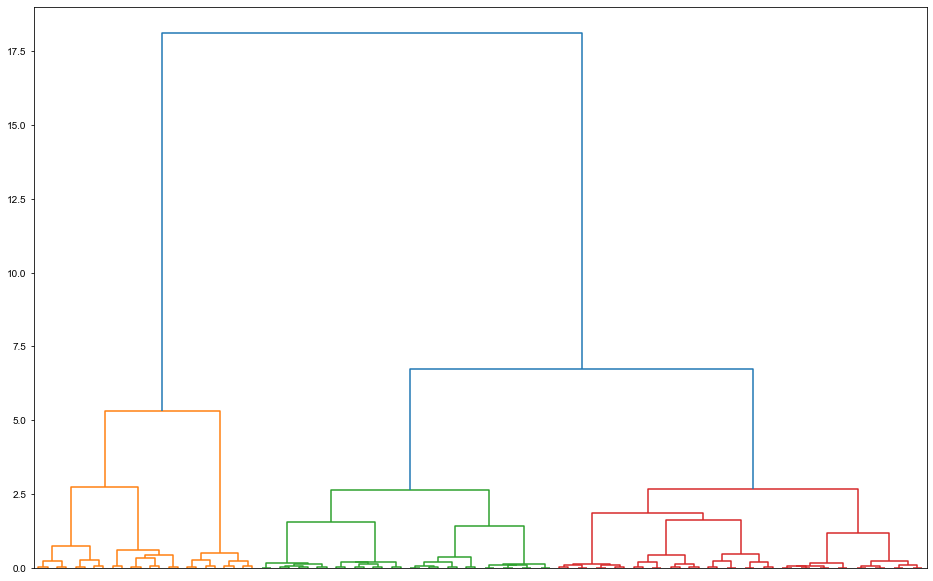

<Figure size 720x360 with 0 Axes>

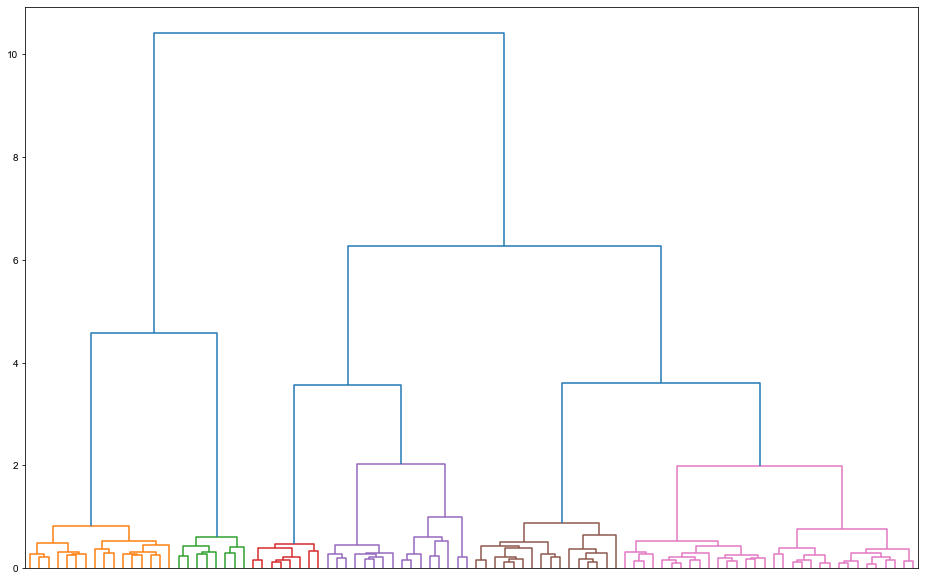

<Figure size 720x360 with 0 Axes>

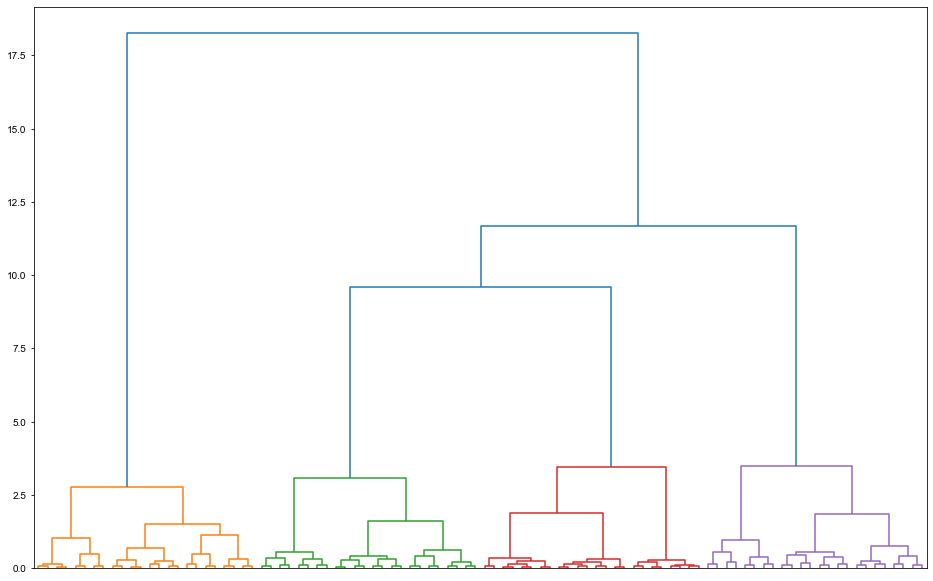

<Figure size 720x360 with 0 Axes>

In [55]:
metric = NormalizedLaplacianSpectrum()
clustering(D_c[best_approx_index], metric, labels, sparses = ['Full', 'Random', 'Local Degree'])